In [3]:
import pandas as pd

## Reading data

In [4]:
#THis is a dataframe. A column in a dataframe is known as a series
df = pd.read_csv('/home/manik/Downloads/Advertising.csv')
df.head()

Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

In [5]:
#trying to index with something else
df = pd.read_csv('/home/manik/Downloads/Advertising.csv',index_col=1)
df.head()

Unnamed: 0  Radio  Newspaper  Sales
TV                                        
230.1           1   37.8       69.2   22.1
44.5            2   39.3       45.1   10.4
17.2            3   45.9       69.3    9.3
151.5           4   41.3       58.5   18.5
180.8           5   10.8       58.4   12.9

In [23]:
#To index into the data set using the unnamed column use the following
df = pd.read_csv('/home/manik/Downloads/Advertising.csv',index_col=0)
df.head()

TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [7]:
#tail method shows you the last 5 rows
df.tail()

TV  Radio  Newspaper  Sales
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

In [8]:
#shape attribute gives (rows,cols)
df.shape

(200, 4)

## Visualizing the data

In [9]:
%matplotlib inline

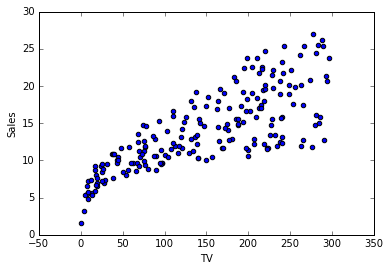

In [10]:
df.plot.scatter(x='TV',y='Sales')

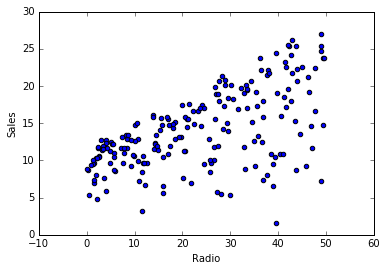

In [11]:
df.plot.scatter(x='Radio',y='Sales')

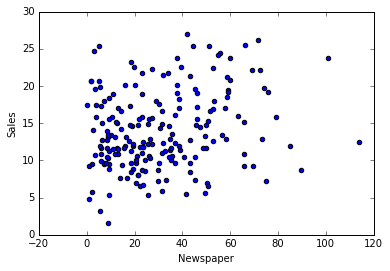

In [12]:
df.plot.scatter(x='Newspaper',y='Sales')

## Applying Linear Regression

### scikit learn expects numpy arrays as arguments and pandas is built on top of numpy arrays
### x can be a dataframe and y can be a series

In [13]:
#creating the dataframe
X = df[['TV','Radio','Newspaper']]
X.head()

TV  Radio  Newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4

In [14]:
print type(X)
print X.shape

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [15]:
Y = df['Sales']
Y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [16]:
print type(Y)
print Y.shape

<class 'pandas.core.series.Series'>
(200,)


## Split x and y into training and testing sets

In [17]:
#default is a 25% split
from sklearn.cross_validation import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)

## Regressing sales on to the 3 attributes

In [18]:
#import model
from sklearn.linear_model import LinearRegression

#instantiate model
linreg = LinearRegression()

#fit the model
linreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
#attributes that were estimated from the model
print linreg.coef_
print linreg.intercept_

[ 0.04656457  0.17915812  0.00345046]
2.87696662232


## Making predictions

In [20]:
Y_pred = linreg.predict(X_test)

## Analysis of advertising budget of TV vs Sales

In [21]:
#trying to index with something else
df = pd.read_csv('/home/manik/Downloads/Advertising.csv',index_col=1)
df.head()

Unnamed: 0  Radio  Newspaper  Sales
TV                                        
230.1           1   37.8       69.2   22.1
44.5            2   39.3       45.1   10.4
17.2            3   45.9       69.3    9.3
151.5           4   41.3       58.5   18.5
180.8           5   10.8       58.4   12.9

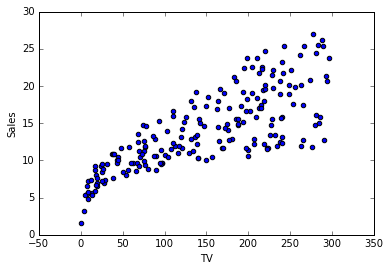

In [24]:
df.plot.scatter(x='TV',y='Sales')

In [25]:
x_tv = df[['TV']]
print type(x_tv)
print x_tv.shape

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [26]:
Y = df['Sales']

### Not splitting the data

In [27]:
linreg.fit(x_tv,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
print linreg.coef_
print linreg.intercept_
c = linreg.intercept_
m = linreg.coef_

[ 0.04753664]
7.03259354913


In [29]:
import matplotlib.pyplot as plt

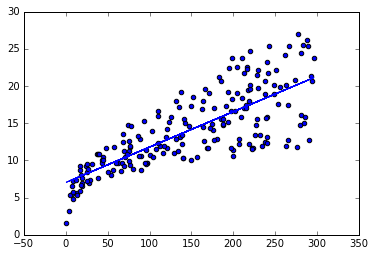

In [30]:
plt.scatter(x_tv,Y)
plt.plot(x_tv,m*x_tv + c,'-')

### Making a contour plot

#### I need different values of B0 and B1 and RSS

In [31]:
import numpy as np

In [32]:
#I'll try B0 between 5 and 9 since I know the optimal value is around 7
B0 = np.arange(5,9,0.01)

#I'll try B1 between 0.02 and 0.06
B1 = np.arange(0.02,0.06,0.0001)

print B0.shape
print B1.shape

(400,)
(400,)


In [39]:
import matplotlib.mlab as mlab
import matplotlib.cm as cm

In [43]:
xv,yv = np.meshgrid(B0,B1)

In [44]:
xv

array([[ 5.  ,  5.01,  5.02, ...,  8.97,  8.98,  8.99],
       [ 5.  ,  5.01,  5.02, ...,  8.97,  8.98,  8.99],
       [ 5.  ,  5.01,  5.02, ...,  8.97,  8.98,  8.99],
       ..., 
       [ 5.  ,  5.01,  5.02, ...,  8.97,  8.98,  8.99],
       [ 5.  ,  5.01,  5.02, ...,  8.97,  8.98,  8.99],
       [ 5.  ,  5.01,  5.02, ...,  8.97,  8.98,  8.99]])

In [45]:
yv

array([[ 0.02  ,  0.02  ,  0.02  , ...,  0.02  ,  0.02  ,  0.02  ],
       [ 0.0201,  0.0201,  0.0201, ...,  0.0201,  0.0201,  0.0201],
       [ 0.0202,  0.0202,  0.0202, ...,  0.0202,  0.0202,  0.0202],
       ..., 
       [ 0.0597,  0.0597,  0.0597, ...,  0.0597,  0.0597,  0.0597],
       [ 0.0598,  0.0598,  0.0598, ...,  0.0598,  0.0598,  0.0598],
       [ 0.0599,  0.0599,  0.0599, ...,  0.0599,  0.0599,  0.0599]])

In [53]:
x_tv_np  = np.array(x_tv)

In [90]:
Ynp = np.array(Y)
Ynp
print(Ynp.shape)
print(x_tv_np.shape)

(200,)
(200,)


In [91]:
print type(Ynp)
print type(x_tv_np)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [92]:
RSS = []
for b0 in B0:
    rss = []
    for b1 in B1:
        err = (Ynp - b0 - b1*x_tv_np)**2
        rss.append(err.sum()) #append rss for this b0 and b1
    RSS.append(rss)

In [58]:
RSS

[[2680233.9411999998,
  2674264.8904987802,
  2668319.0042711198,
  2662396.2825170201,
  2656496.7252364801,
  2650620.3324295003,
  2644767.1040960797,
  2638937.0402362198,
  2633130.14084992,
  2627346.4059371804,
  2621585.8354979996,
  2615848.4295323803,
  2610134.1880403203,
  2604443.1110218205,
  2598775.1984768803,
  2593130.4504055004,
  2587508.8668076806,
  2581910.4476834205,
  2576335.1930327206,
  2570783.1028555804,
  2565254.1771520004,
  2559748.415921981,
  2554265.8191655204,
  2548806.3868826209,
  2543370.1190732811,
  2537957.0157375005,
  2532567.0768752811,
  2527200.3024866208,
  2521856.6925715208,
  2516536.2471299809,
  2511238.9661620012,
  2505964.8496675808,
  2500713.8976467205,
  2495486.1100994209,
  2490281.487025681,
  2485100.0284255007,
  2479941.7342988811,
  2474806.6046458213,
  2469694.6394663211,
  2464605.8387603811,
  2459540.2025280008,
  2454497.7307691812,
  2449478.4234839212,
  2444482.2806722214,
  2439509.3023340809,
  2434559.4884

In [93]:
RSS_np = np.array(RSS)

In [94]:
type(RSS_np)
RSS_np

array([[ 10612.063756  ,  10568.27297274,  10524.59801186, ...,
          2331.45584662,   2333.64654338,   2335.9530625 ],
       [ 10587.757156  ,  10544.02518974,  10500.40904586, ...,
          2330.49959562,   2332.74910938,   2335.1144455 ],
       [ 10563.490556  ,  10519.81740674,  10476.26007986, ...,
          2329.58334462,   2331.89167538,   2334.3158285 ],
       ..., 
       [  4106.583556  ,   4086.14312174,   4065.81850986, ...,
          5096.06419961,   5121.60524538,   5147.2621135 ],
       [  4098.156956  ,   4077.77533874,   4057.50954386, ...,
          5110.98794861,   5136.58781138,   5162.3034965 ],
       [  4089.770356  ,   4069.44755574,   4049.24057786, ...,
          5125.95169761,   5151.61037738,   5177.3848795 ]])

In [97]:
print(RSS_np.shape)
print(RSS_np.min())
err = (Ynp - 7.03 - 0.0475*x_tv_np)**2
print(err.sum())

(400, 400)
2102.53336744
2102.54529244


In [71]:
print(xv.shape)
print type(xv)

(400, 400)
<type 'numpy.ndarray'>


In [66]:
yv.shape

(400, 400)

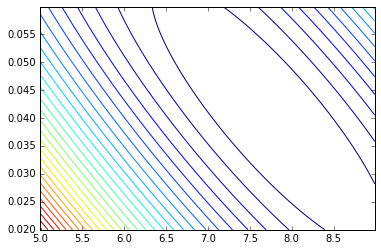

In [95]:
plt.figure()
CS = plt.contour(xv,yv,RSS_np,30)

In [80]:
Ynp.shape

(200,)

In [84]:
x_tv_np = np.array(x_tv)

In [86]:
x_tv_np = x_tv_np.flatten()

In [88]:
x_tv_np.shape

(200,)